# steps
1. Gathering data : Collecting data from various sources, such as surveys, interviews, and online reviews.
2. Tools to clean data (kis se clean) libraries
3. How to do, kaisay (steps)
>1. Dealing with missing value
>2. correcting errors in the data (removing outliers in the data)
>>1. Visualization
>>2. IQR Method
>>3. Z-score method
>3. Removing duplicates
>4. Transforming data
>>1. Normalize the data (Data normalization)
>>2. min-max normalization/scalling
>>3. log transformation
>>4. winsorization
>>5. Z-score normalization
>>6. Decimal scaling
4. Organizing data
>>1. Columns creation
>>2. Data Renaming
5. Saving the data




In [57]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [58]:
df=sns.load_dataset('titanic') #gethering the data

In [59]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [60]:
df.info() # assessing the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [61]:
#cleaning the data
df.isnull().sum()/len(df)*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [62]:
df.drop(columns="deck",inplace=True)

In [63]:
df['age'].fillna(df.groupby(['pclass','sex'])['age'].transform('mean'),inplace=True)

In [64]:
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)

In [65]:
df['embark_town'].fillna(df['embark_town'].mode()[0],inplace=True)

In [66]:
df.isnull().sum()/len(df)*100

survived       0.0
pclass         0.0
sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
embarked       0.0
class          0.0
who            0.0
adult_male     0.0
embark_town    0.0
alive          0.0
alone          0.0
dtype: float64

# OUTLIERS REMOVAL
# Visualization wala method

<Axes: xlabel='sex', ylabel='age'>

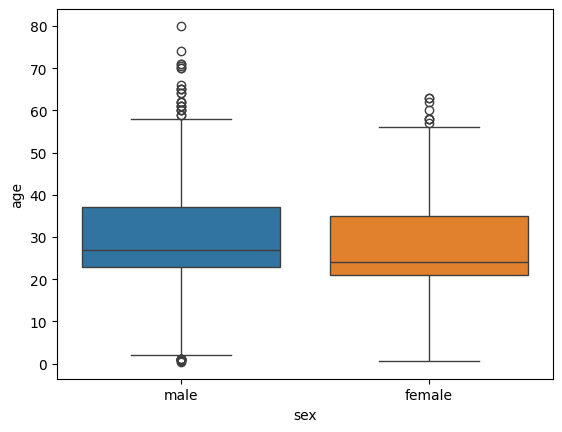

In [67]:
#with seaborn library
sns.boxplot(data=df, y="age",x='sex',hue='sex')

<Axes: xlabel='sex', ylabel='fare'>

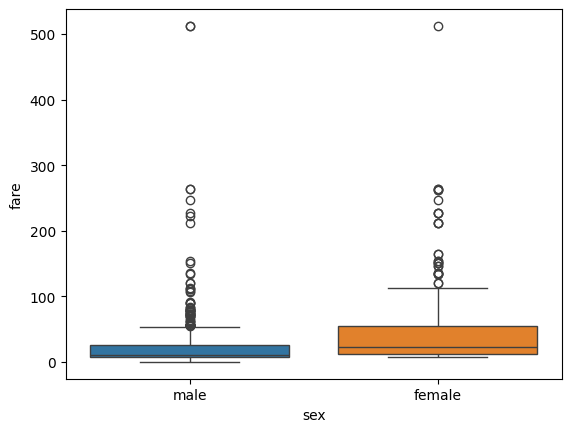

In [68]:
sns.boxplot(x='sex',y='fare',data=df,hue='sex')

# PIVOT DATA

In [69]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

In [70]:
table=pd.pivot_table(df,values='age',index='who',columns='survived',aggfunc=np.mean)
table


C:\Users\AIMAN\AppData\Local\Temp\ipykernel_9984\4111972427.py:1: FutureWarning: The provided callable <function mean at 0x000002CF58231940> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  table=pd.pivot_table(df,values='age',index='who',columns='survived',aggfunc=np.mean)


survived,0,1
who,,
child,7.220588,5.778980
man,32.018557,33.630189
woman,28.215909,31.200985


SCATTERPLOT

<Axes: xlabel='fare', ylabel='age'>

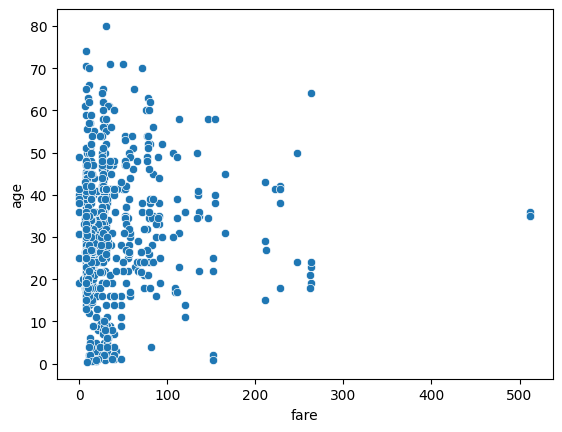

In [71]:
sns.scatterplot(x='fare',y='age',data=df)

In [72]:
#IQR METHOD
q1=df['age'].quantile(0.25)
q3=df['age'].quantile(0.75)
iqr=q3-q1
print(iqr)
lower_bound=q1-iqr*1.5
upper_bound=q3+iqr*1.5
print('lower bound=',lower_bound)
print('upper bound=',upper_bound)
print('median',df['age'].median())
print('sd=',df['age'].std())
df1=df[(df['age']>lower_bound) & (df['age']<upper_bound)]
df1.shape


14.25
lower bound= 0.375
upper bound= 57.375
median 26.507588932806325
sd= 13.281102760334132


(858, 14)

In [73]:
#pip install scipy
from scipy import stats
import numpy as np

In [74]:
df.count()

survived       891
pclass         891
sex            891
age            891
sibsp          891
parch          891
fare           891
embarked       891
class          891
who            891
adult_male     891
embark_town    891
alive          891
alone          891
dtype: int64

In [75]:
891-111

780

In [76]:
#finding and droping duplicates
df.drop_duplicates(inplace=True)

In [77]:
# df_duplicates=df[df.duplicated()]
# sns.barplot(data=df_duplicates)
# df_duplicates

In [78]:
#pip install scikit-learn
#data normalization 
import pandas as pd
#1. import the library and data set
from sklearn.preprocessing import StandardScaler


In [79]:
#2. data
df
#3. select columns to normalize
cols_to_normalize=['age']
#4. create the scaler function/tool
scaler=StandardScaler()
#5. fit and transform the data on scaler or vice versa
df[cols_to_normalize]=scaler.fit_transform(df[cols_to_normalize])
#6. check the data
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,-0.552504,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,0.596415,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,-0.265275,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.380992,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.380992,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.668222,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,-0.767927,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,-0.570456,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,-0.265275,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [80]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,780.000000,780.000000,7.800000e+02,780.000000,780.000000,780.000000
mean,0.412821,2.246154,2.915047e-16,0.525641,0.417949,34.829108
std,0.492657,0.854452,1.000642e+00,0.988046,0.838536,52.263440
min,0.000000,1.000000,-2.102108e+00,0.000000,0.000000,0.000000
25%,0.000000,1.000000,-5.839200e-01,0.000000,0.000000,8.050000
50%,0.000000,3.000000,-1.216597e-01,0.000000,0.000000,15.950000
75%,1.000000,3.000000,5.964145e-01,1.000000,1.000000,34.375000
max,1.000000,3.000000,3.612326e+00,8.000000,6.000000,512.329200


#log tranformation

<Axes: xlabel='sex', ylabel='age'>

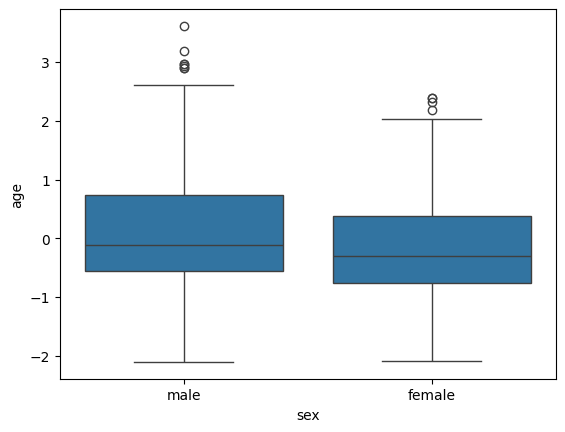

In [81]:
sns.boxplot(x='sex',y='age',data=df)

<Axes: xlabel='sex', ylabel='fare'>

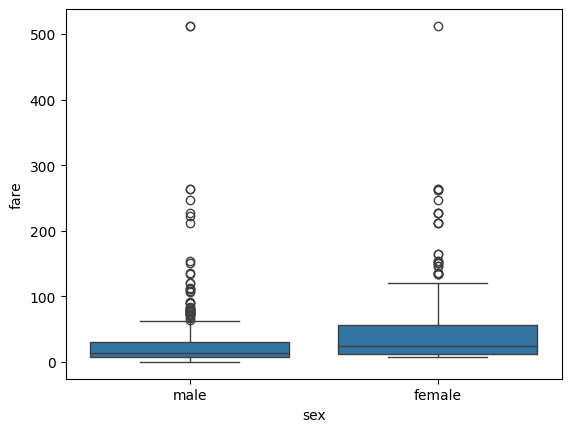

In [82]:
sns.boxplot(x='sex',y='fare',data=df)

In [83]:
df['fare']=np.log1p(df['fare'])
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,-0.552504,1,0,2.110213,S,Third,man,True,Southampton,no,False
1,1,1,female,0.596415,1,0,4.280593,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,-0.265275,0,0,2.188856,S,Third,woman,False,Southampton,yes,True
3,1,1,female,0.380992,1,0,3.990834,S,First,woman,False,Southampton,yes,False
4,0,3,male,0.380992,0,0,2.202765,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,0.668222,0,5,3.405355,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,-0.767927,0,0,3.433987,S,First,woman,False,Southampton,yes,True
888,0,3,female,-0.570456,1,2,3.196630,S,Third,woman,False,Southampton,no,False
889,1,1,male,-0.265275,0,0,3.433987,C,First,man,True,Cherbourg,yes,True


<Axes: xlabel='sex', ylabel='fare'>

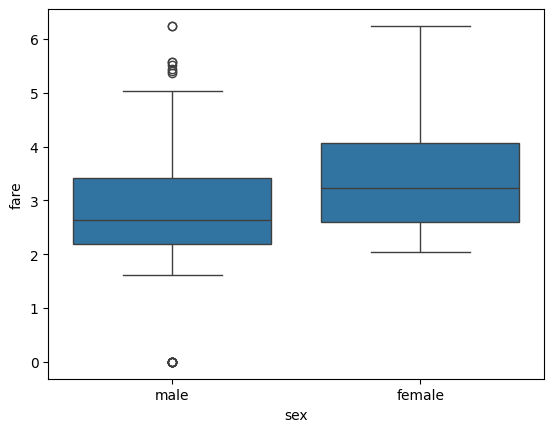

In [84]:
sns.boxplot(x='sex',y='fare',data=df)

SAVING DATA

In [86]:
df.to_csv("preprocessed_data.csv")